In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('./Complete-data.csv')
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [3]:
df.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope'],
      dtype='object')

In [4]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope']] = minmax_scaler.fit_transform(df_minmax_scaled[['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope']])
df_minmax_scaled.columns = [col + '_mm' if col in ['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope'] else col for col in df_minmax_scaled.columns]
df_minmax_scaled.drop(columns=['Landslide'], inplace=True)
df_minmax_scaled.columns

Index(['Aspect_mm', 'Curvature_mm', 'Earthquake_mm', 'Elevation_mm', 'Flow_mm',
       'Lithology_mm', 'NDVI_mm', 'NDWI_mm', 'Plan_mm', 'Precipitation_mm',
       'Profile_mm', 'Slope_mm'],
      dtype='object')

In [5]:
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope']] = standard_scaler.fit_transform(df_standard_scaled[['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope']])
df_standard_scaled.columns = [col + '_ss' if col in ['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope'] else col for col in df_standard_scaled.columns]
df_standard_scaled.drop(columns=['Landslide'], inplace=True)
df_standard_scaled.columns

Index(['Aspect_ss', 'Curvature_ss', 'Earthquake_ss', 'Elevation_ss', 'Flow_ss',
       'Lithology_ss', 'NDVI_ss', 'NDWI_ss', 'Plan_ss', 'Precipitation_ss',
       'Profile_ss', 'Slope_ss'],
      dtype='object')

In [6]:
df_freq_encoded = df.copy()
df_freq_encoded.drop(columns=['Landslide'], inplace=True)
for column in df_freq_encoded.columns:
    counts = df[column].value_counts(normalize=True)
    df_freq_encoded.drop(columns=[column], inplace=True)
    df_freq_encoded[column + '_freq'] = df[column].map(counts)

In [7]:
df_mean_encoded = df.copy()
df_mean_encoded.drop(columns=['Landslide'], inplace=True)
for column in df_mean_encoded.columns:
    mean_encode_map = df.groupby(column)['Landslide'].mean()
    df_mean_encoded.drop(columns=[column], inplace=True)
    df_mean_encoded[column + '_mean'] = df[column].map(mean_encode_map)

In [8]:
df_combined = pd.concat([df, df_minmax_scaled, df_standard_scaled, df_freq_encoded, df_mean_encoded, interaction_features_df], axis=1)
df_combined.head()
df_combined.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope', 'Aspect_mm', 'Curvature_mm', 'Earthquake_mm', 'Elevation_mm',
       'Flow_mm', 'Lithology_mm', 'NDVI_mm', 'NDWI_mm', 'Plan_mm',
       'Precipitation_mm', 'Profile_mm', 'Slope_mm', 'Aspect_ss',
       'Curvature_ss', 'Earthquake_ss', 'Elevation_ss', 'Flow_ss',
       'Lithology_ss', 'NDVI_ss', 'NDWI_ss', 'Plan_ss', 'Precipitation_ss',
       'Profile_ss', 'Slope_ss', 'Aspect_freq', 'Curvature_freq',
       'Earthquake_freq', 'Elevation_freq', 'Flow_freq', 'Lithology_freq',
       'NDVI_freq', 'NDWI_freq', 'Plan_freq', 'Precipitation_freq',
       'Profile_freq', 'Slope_freq', 'Aspect_mean', 'Curvature_mean',
       'Earthquake_mean', 'Elevation_mean', 'Flow_mean', 'Lithology_mean',
       'NDVI_mean', 'NDWI_mean', 'Plan_mean', 'Precipitation_mean',
       'Profile_mean', 'Slope_mean'],
      dtype='object')

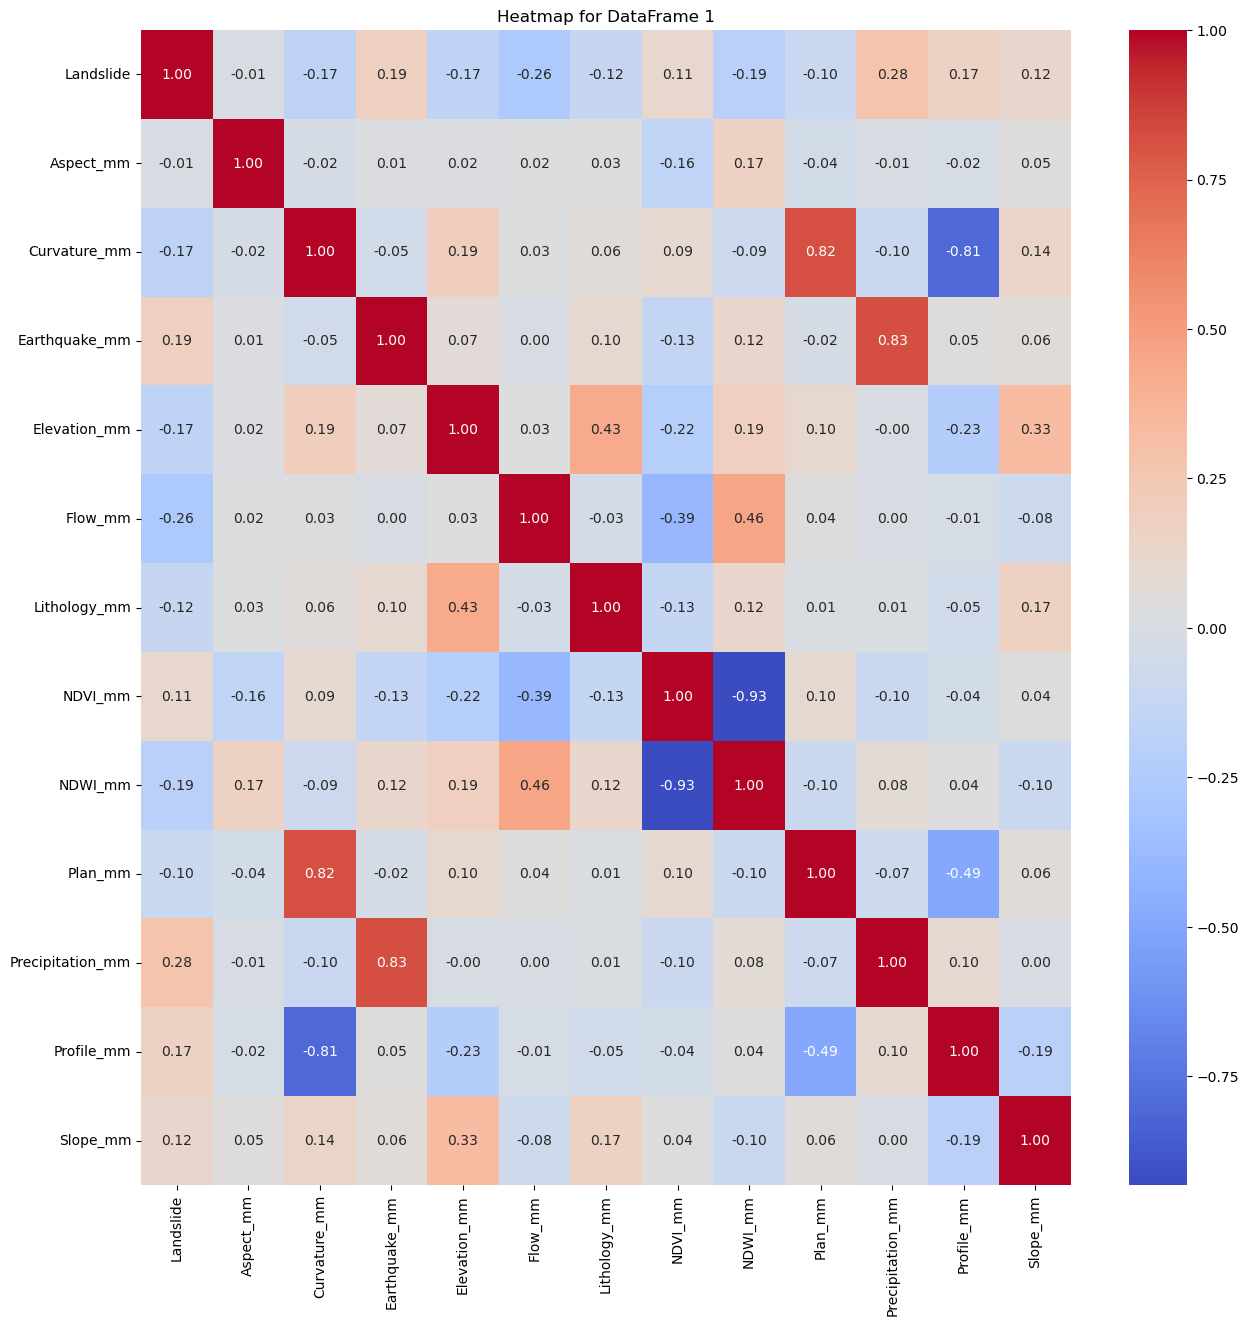

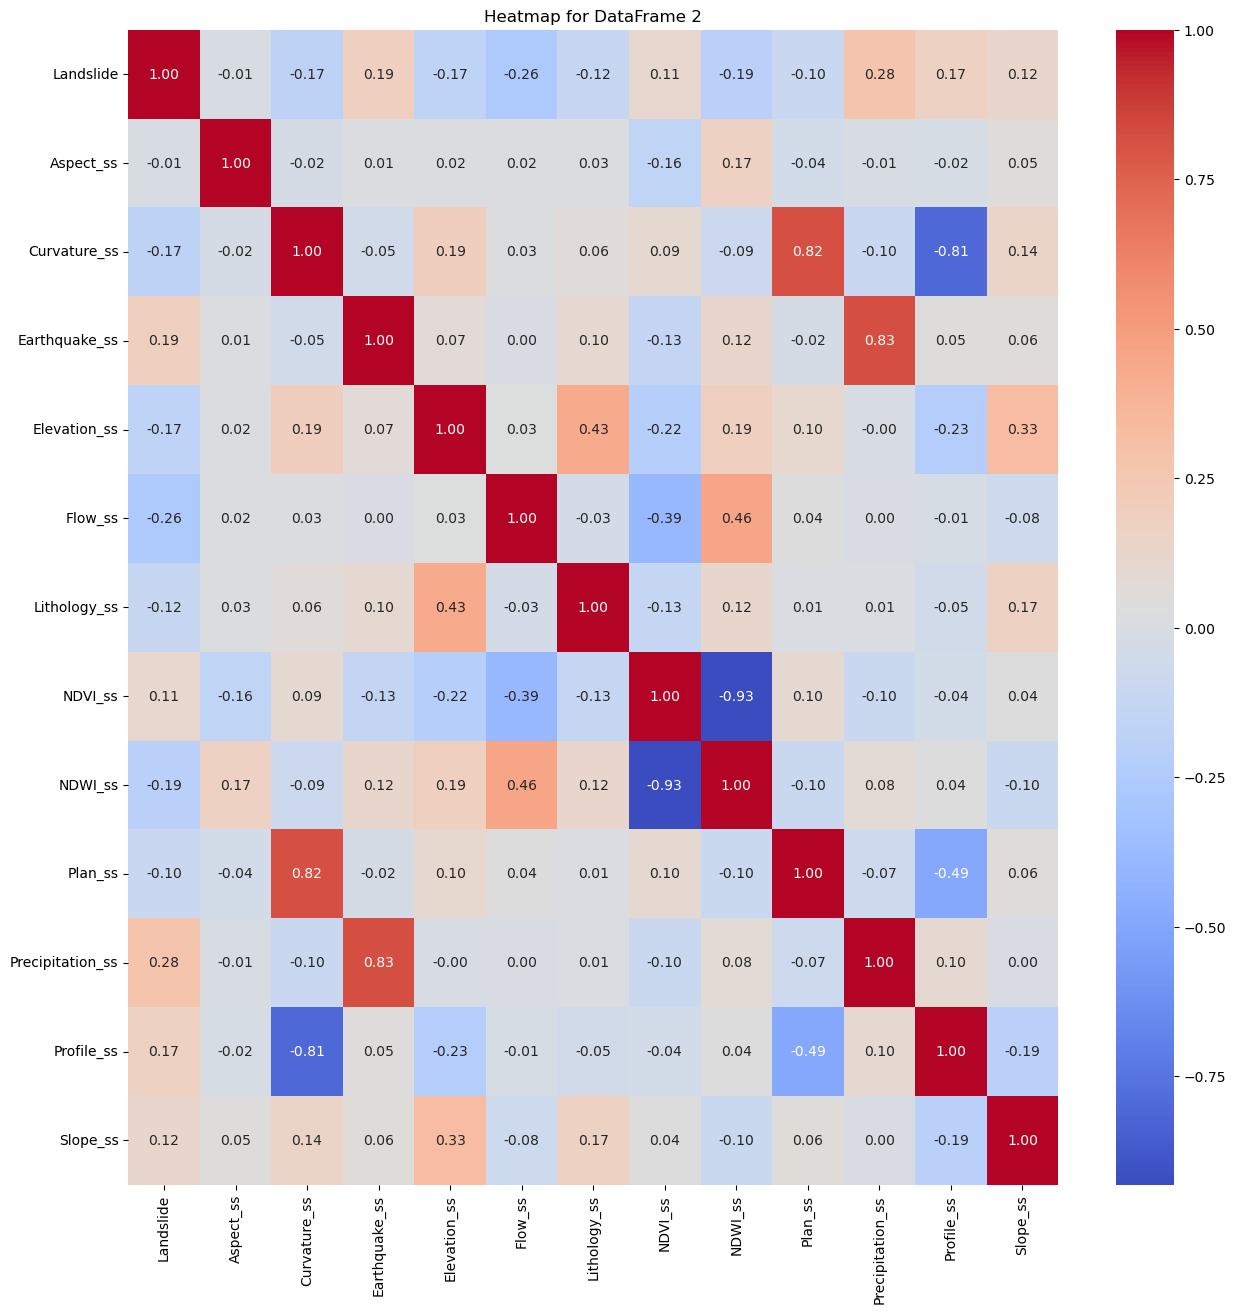

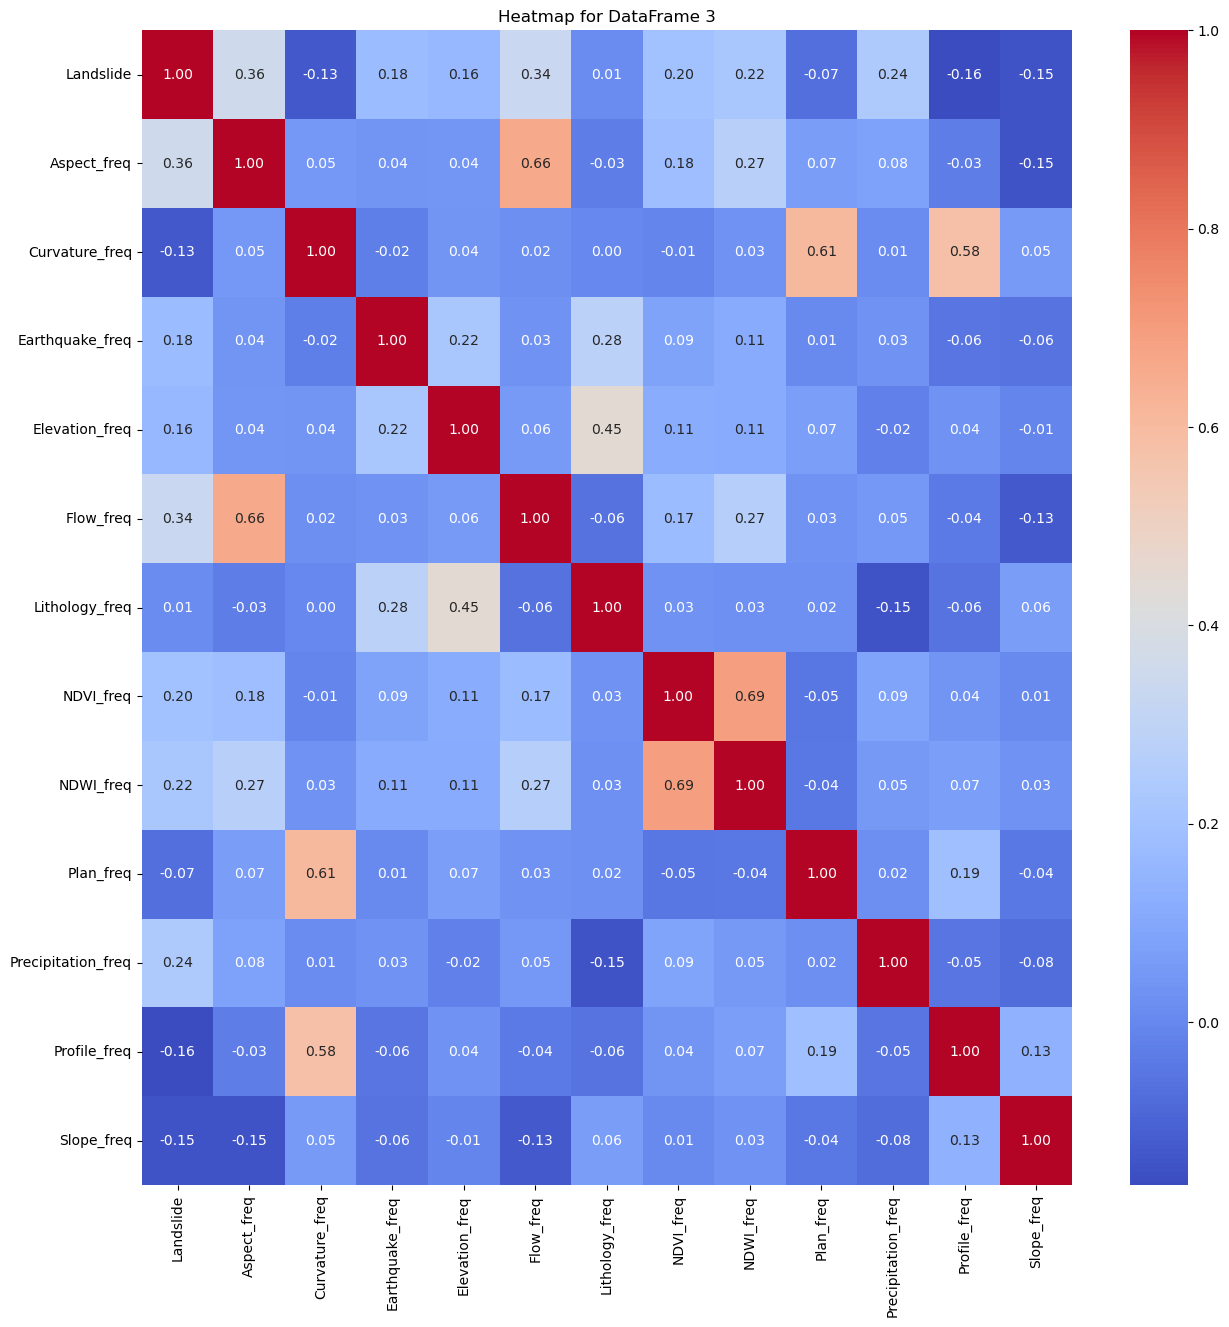

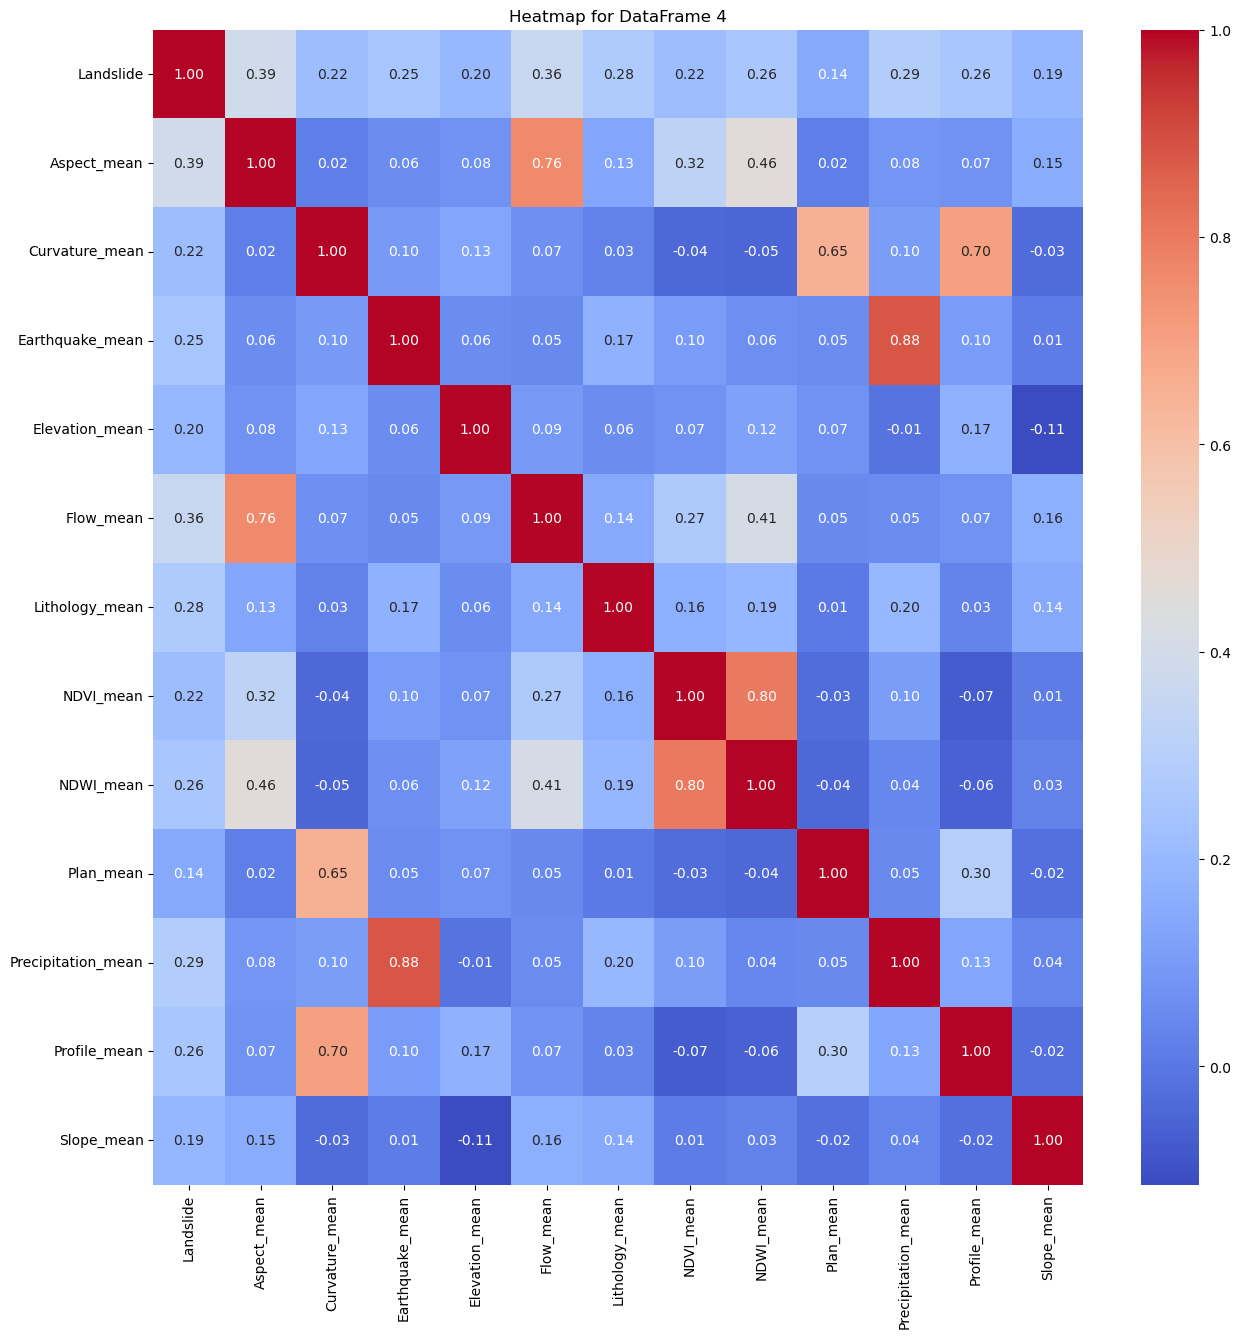

In [9]:
dataframes = [df_minmax_scaled, df_standard_scaled, df_freq_encoded, df_mean_encoded]

for i, dataframe in enumerate(dataframes, start=1):
    dataframe.insert(0, 'Landslide', df['Landslide'])
    plt.figure(figsize=(15, 15))  # Set the size of the heatmap
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Heatmap for DataFrame {i}")
    plt.show()